### This code is used to combine the plot of the data from SGD and Adam

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
working_dir = os.getcwd()
print(working_dir)

SGD_foler = working_dir + '/epoch_30e'
Adam_folder = working_dir + '/epoch_30adam'
print(SGD_foler, Adam_folder)

# load SGD data
SGD_train_acc = np.load(os.path.join(SGD_foler + '/test_acc.npy'), allow_pickle=True)
SGD_train_acc = np.load(os.path.join(SGD_foler + '/train_acc.npy'), allow_pickle=True)
SGD_train_loss = np.load(os.path.join(SGD_foler + '/train_l.npy'), allow_pickle=True)
SGD_time_forward = np.load(os.path.join(SGD_foler + '/time_forward.npy'), allow_pickle=True)
SGD_time_round = np.load(os.path.join(SGD_foler + '/time_round.npy'), allow_pickle=True)
SGD_time_epoch = np.load(os.path.join(SGD_foler + '/time_epoch.npy'), allow_pickle=True)
SGD_energy_epoch = np.load(os.path.join(SGD_foler + '/energy_epoch.npy'), allow_pickle=True)

# load Adam data
Adam_train_acc = np.load(os.path.join(Adam_folder + '/test_acc.npy'), allow_pickle=True)
Adam_train_acc = np.load(os.path.join(Adam_folder + '/train_acc.npy'), allow_pickle=True)
Adam_train_loss = np.load(os.path.join(Adam_folder + '/train_l.npy'), allow_pickle=True)
Adam_time_forward = np.load(os.path.join(Adam_folder + '/time_forward.npy'), allow_pickle=True)
Adam_time_round = np.load(os.path.join(Adam_folder + '/time_round.npy'), allow_pickle=True)
Adam_time_epoch = np.load(os.path.join(Adam_folder + '/time_epoch.npy'), allow_pickle=True)
Adam_energy_epoch = np.load(os.path.join(Adam_folder + '/energy_epoch.npy'), allow_pickle=True)

# print data shape
print(SGD_train_acc.shape, SGD_train_loss.shape, SGD_time_forward.shape, SGD_time_round.shape, SGD_time_epoch.shape, SGD_energy_epoch.shape)
print(Adam_train_acc.shape, Adam_train_loss.shape, Adam_time_forward.shape, Adam_time_round.shape, Adam_time_epoch.shape, Adam_energy_epoch.shape)

/home/yj/pytorch/chapter_convolutional-modern/alexnet
/home/yj/pytorch/chapter_convolutional-modern/alexnet/epoch_30e /home/yj/pytorch/chapter_convolutional-modern/alexnet/epoch_30adam
(30, 469) (30, 469) (30, 6) (30, 6) (30, 2) (30, 1)
(30, 469) (30, 469) (30, 6) (30, 6) (30, 2) (30, 1)


In [12]:
def change_to_float(energy_epoch):
    energy_epoch_f = energy_epoch.astype(float)
    energy_epochfloat = energy_epoch_f.reshape(1, -1)
    energy_epochfloat = energy_epochfloat[0]
    return energy_epochfloat

SGD_energy_epochfloat = change_to_float(SGD_energy_epoch)
Adam_energy_epochfloat = change_to_float(Adam_energy_epoch)
print(SGD_energy_epochfloat.shape, Adam_energy_epochfloat.shape)

(30,) (30,)


/tmp/ipykernel_5639/1519079682.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  energy_epoch_f = energy_epoch.astype(float)


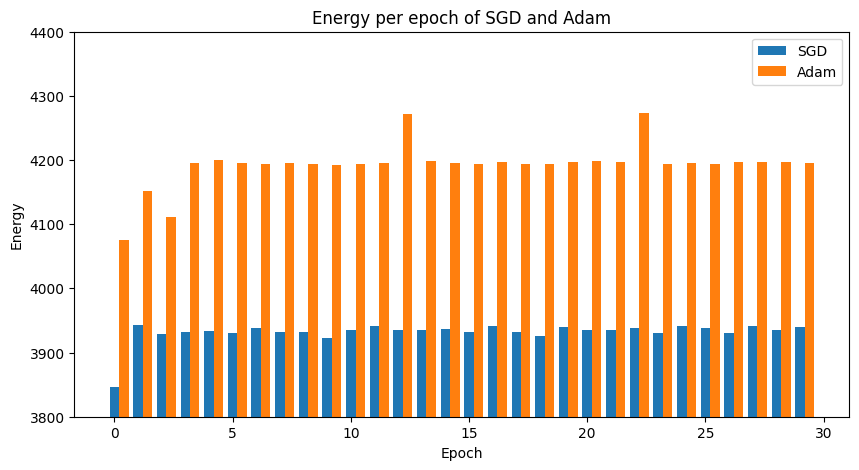

In [22]:
# plot SGD_energy_epoch and Adam_energy_epoch using bar chart side by side in same figure
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(SGD_energy_epochfloat)), SGD_energy_epochfloat, width=0.4, label='SGD')
plt.bar(np.arange(len(Adam_energy_epochfloat))+0.4, Adam_energy_epochfloat, width=0.4, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Energy')
plt.title('Energy per epoch of SGD and Adam')
plt.ylim(3800,4400)
plt.legend()
plt.show()
